
#Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

##Aprendizaje No Supervisado

Edición 2022

##Grupo 3

#Consigna

Práctico entregable: 
Utilizar la base de jugadores “players_22.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset . Considerar que la base 2022 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019. Realice comentarios en cada parte (verbose=True ;))

1. Análisis exploratorio de la base.
2. Evaluación visual  e intuitiva de a dos variables numéricas por vez.
3. Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros
4. Evaluación y Análisis de los clusters encontrados.
5. Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?
6. Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.


In [1]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn import (manifold, preprocessing, decomposition)


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
import warnings
import io

## 1 Analisis Exploratorio de la Base

##Carga de la base de datos de Kaggle - FIFA Players 2022

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/jmateoramos/AprendizajeNoSup-Grupo3-KaggleFifa22/main/players_22.csv') 
df.head(5)

/tmp/ipykernel_6862/1621912504.py:1: DtypeWarning:

Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.



sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

La base de datos esta compuesta por 110 variables relacionadas no solo a las habilidades del jugador sino también al club donde pertenecen, su sueldo, valor del jugador, vencimiento de su contrato, número de camiseta, posición en la que juega y otros datos más personales como el nombre, la fecha de nacimiento, el peso y la altura. 

In [4]:
# Descripción de algunas variables numéricas.
print(df.describe())

           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863

##Analisis de la variable Overall

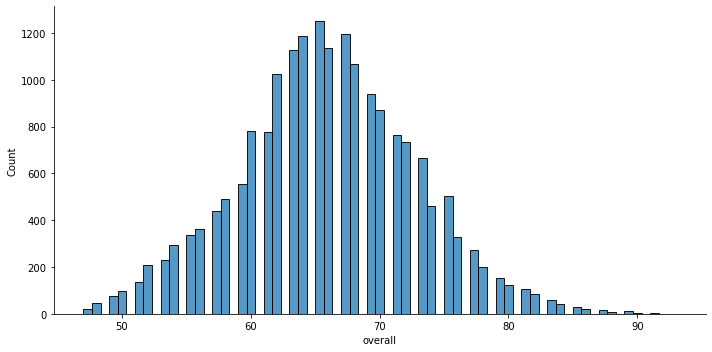

In [5]:
sns.displot(df.overall, aspect=2) 
plt.ticklabel_format(style='plain', axis='x')

La variable 'Overall' es una variable numérica discreta, así como las otras de desempeño según habilidad ('Crossing','Finishing', 'HeadingAccuracy', etc.) toma valores enteros entre 0 y 100.


## Análisis de las diferentes variables Skills
Ahora las habilidades estan asociadas con una cierta key que las junta en distintos grupos. Los datos que estan en estas columnas son numéricos dado que se refieren al puntaje que tiene cada jugador en cuanto a esa habilidad. Mientras más cercano a 100 más habilidoso es el jugador en esa habilidad específica. 


In [6]:
attacking_skills = df.columns[df.columns.str.contains('attacking')]
skills = df.columns[df.columns.str.contains('skill')]
skill_move =  df.columns[df.columns.str.contains('movement')]
power = df.columns[df.columns.str.contains('power')]
mentality = df.columns[df.columns.str.contains('mentality')]
defending = df.columns[df.columns.str.contains('defending_')]
gk = df.columns[df.columns.str.contains('goalkeeping')]
general = ['pace', 'shooting', 'passing','defending','dribbling', 'physic']

In [7]:
#Habilidades generales
df_g = df[general]
df_g

pace  shooting  passing  defending  dribbling  physic
0      85.0      92.0     91.0       34.0       95.0    65.0
1      78.0      92.0     79.0       44.0       86.0    82.0
2      87.0      94.0     80.0       34.0       88.0    75.0
3      91.0      83.0     86.0       37.0       94.0    63.0
4      76.0      86.0     93.0       64.0       88.0    78.0
...     ...       ...      ...        ...        ...     ...
19234  58.0      35.0     46.0       42.0       48.0    49.0
19235  59.0      39.0     50.0       41.0       46.0    51.0
19236  60.0      37.0     45.0       41.0       49.0    52.0
19237  68.0      46.0     36.0       15.0       48.0    42.0
19238  68.0      38.0     45.0       36.0       48.0    48.0

[19239 rows x 6 columns]

Realizamos una matriz de correlación entre las habilidades generales y vemos que algunas de ellas están bastante correlacionadas de forma positiva, como por ejemplo shooting y dribbling. Esto nos podría dar una pauta de que si un jugador tiene un alto puntaje en alguna de estas dos habilidades, muy probablemente también tenga un alto puntaje en la otra habilidad. 

Esto nos podría ayudar a elegir las habilidades que nos brinden información suficiente para separar los jugadores en distintas clases. 

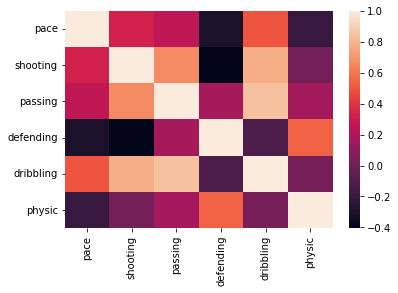

In [8]:
import matplotlib.pyplot as plt
corr_df = df_g.corr(method='pearson') 

sns.heatmap(corr_df)
plt.show()

In [9]:
# Hay jugadores que juegan en más de una posición y por eso se divide la columna "player_positions" en tres columnas distintas para poder analizar mejor esta variable
df[['Position 1', 'Position 2', 'Position 3']] =  df['player_positions'].str.split(',', expand = True)
df['Position 2'] = df['Position 2'].fillna('-')
df['Position 3'] = df['Position 3'].fillna('-')
df.head(10)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   
5     200389  https://sofifa.com/player/200389/jan-oblak/220002   
6     231747  https://sofifa.com/player/231747/kylian-mbappe...   
7     167495  https://sofifa.com/player/167495/manuel-neuer/...   
8     192448  https://sofifa.com/player/192448/marc-andre-te...   
9     202126  https://sofifa.com/player/202126/harry-kane/22...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   
5           J. Oblak                            Jan Oblak               GK   
6          K. Mbappé                 Kylian Mbappé Lottin           ST, LW   
7           M. Neuer                   Manuel Peter Neuer               GK   
8      M. ter Stegen                Marc-André ter Stegen               GK   
9            H. Kane                           Harry Kane               ST   

   overall  potential    value_eur  wage_eur  age  ...    rb    gk  \
0       93         93   78000000.0  320000.0   34  ...  61+3  19+3   
1       92         92  119500000.0  270000.0   32  ...  61+3  19+3   
2       91         91   45000000.0  270000.0   36  ...  60+3  20+3   
3       91         91  129000000.0  270000.0   29  ...  62+3  20+3   
4       91         91  125500000.0  350000.0   30  ...  75+3  21+3   
5       91         93  112000000.0  130000.0   28  ...  32+3  89+3   
6       91         95  194000000.0  230000.0   22  ...  63+3  18+3   
7       90         90   13500000.0   86000.0   35  ...  35+3  88+2   
8       90         92   99000000.0  250000.0   29  ...  31+3  88+3   
9       90         90  129500000.0  240000.0   27  ...  64+3  20+3   

                                     player_face_url  \
0  https://cdn.sofifa.net/players/158/023/22_120.png   
1  https://cdn.sofifa.net/players/188/545/22_120.png   
2  https://cdn.sofifa.net/players/020/801/22_120.png   
3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  https://cdn.sofifa.net/players/192/985/22_120.png   
5  https://cdn.sofifa.net/players/200/389/22_120.png   
6  https://cdn.sofifa.net/players/231/747/22_120.png   
7  https://cdn.sofifa.net/players/167/495/22_120.png   
8  https://cdn.sofifa.net/players/192/448/22_120.png   
9  https://cdn.sofifa.net/players/202/126/22_120.png   

                             club_logo_url  \
0   https://cdn.sofifa.net/teams/73/60.png   
1   https://cdn.sofifa.net/teams/21/60.png   
2   https://cdn.sofifa.net/teams/11/60.png   
3   https://cdn.sofifa.net/teams/73/60.png   
4   https://cdn.sofifa.net/teams/10/60.png   
5  https://cdn.sofifa.net/teams/240/60.png   
6   https://cdn.sofifa.net/teams/73/60.png   
7   https://cdn.sofifa.net/teams/21/60.png   
8  https://cdn.sofifa.net/teams/241/60.png   
9   https://cdn.sofifa.net/teams/18/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   
5      https://cdn.sofifa.net/flags/es.png   
6      https://cdn.sofifa.net/flags/fr.png   
7      https://cdn.sofifa.net/flags/de.png   
8      https://cdn.sofifa.net/flags/es.png   
9  https://cdn.sofifa.net/flags/gb-eng.png   

    

## Posiciones de los jugadores

### Defender
CB : Centre-back

RB : Right-back

LB : Left-back

RWB : Right-wing-back

LWB: Left-wing-back

### Midfielder

CM : Central-midfielder

CDM : Central-defensive-mildfielder

CAM : Central-attacking-midfielder

RM : Right-Midfielder

LM : Left-Midfielder

### Forward
RW : Right-winger

ST : Striker

CF : Central-forward

LW : Left-winger

### GK : Goalkeeper

In [10]:
#Concatenamos todas las habilidades en una lista 
skills_ratings = [*attacking_skills, *skill_move, *power, *mentality, *defending, *gk, *skills, *general]

In [11]:
skills_dict = {}
for i in skills_ratings:
  skills_dict[i] = "median"

Se agrupa por las tres columnas de posiciones para ver la mediana del puntaje de cada habilidad según las distintas posiciones en las que juega un mismo jugador. 

In [12]:
# Se agrupa por posición y se calcula la mediana de cada habilidad 
df_position = df.groupby(['Position 1', 'Position 2', 'Position 3']).agg(skills_dict)
df_position = df_position.reset_index()
df_position

Position 1 Position 2 Position 3  attacking_crossing  attacking_finishing  \
0          CAM        CDM         CM                60.5                 58.0   
1          CAM        CDM         LM                77.0                 69.0   
2          CAM        CDM         RM                58.0                 58.0   
3          CAM        CDM         ST                68.0                 64.0   
4          CAM        CDM          -                50.0                 60.0   
..         ...        ...        ...                 ...                  ...   
669         ST         RW         LM                45.0                 64.0   
670         ST         RW         LW                53.0                 66.0   
671         ST         RW         RM                64.0                 68.0   
672         ST         RW          -                53.5                 65.0   
673         ST          -          -                42.0                 67.0   

     attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          41.0                     71.0               46.0   
1                          58.0                     82.0               45.0   
2                          48.0                     74.0               46.0   
3                          57.0                     68.0               59.0   
4                          49.0                     63.0               50.0   
..                          ...                      ...                ...   
669                        60.5                     48.5               50.0   
670                        64.0                     59.0               58.0   
671                        67.5                     64.5               57.5   
672                        61.0                     61.0               59.0   
673                        66.0                     58.0               59.0   

     movement_acceleration  movement_sprint_speed  ...  skill_curve  \
0                     67.0                   66.5  ...         63.0   
1                     64.0                   52.0  ...         81.0   
2                     72.0                   66.0  ...         53.0   
3                     76.0                   71.0  ...         71.0   
4                     67.0                   64.0  ...         53.0   
..                     ...                    ...  ...          ...   
669                   76.5                   77.0  ...         43.0   
670                   77.0                   76.0  ...         51.0   
671                   80.0                   80.0  ...         50.5   
672                   74.0                   75.0  ...         52.0   
673                   68.0                   69.0  ...         50.0   

     skill_fk_accuracy  skill_long_passing  skill_ball_control  pace  \
0                 65.5                65.5                69.0  66.5   
1                 76.0                78.0                80.0  57.0   
2                 45.0                63.0                70.0  69.0   
3                 67.0                69.0                71.0  73.0   
4                 48.0                60.0                62.0  66.0   
..                 ...                 ...                 ...   ...   
669               34.5                41.5                59.0  77.0   
670               40.0                48.0                68.0  76.0   
671               51.0                58.5                71.0  80.0   
672               40.5                49.0                65.0  75.0   
673               40.0                44.0                64.0  69.0   

     shooting  passing  defending  dribbling  physic  
0        58.0     63.5       55.0       67.0    62.5  
1        70.0     79.0       68.0       74.0    64.0  
2        59.0     66.0       56.0       68.0    53.0  
3        65.0     69.0       52.0       68.0    65.0  
4        56.0     59.0       52.0       64.0    58.0  
..        ...      ...        ... 

In [13]:
pos_vs_skill = df_position.drop(columns = ['Position 2', 'Position 3']) #Consideramos la primer columna como la posición "principal" y dado que esta contiene 
# información de las 15 posiciones se va a utilizar sólo esta columna. 
pos_vs_skill = pos_vs_skill.groupby('Position 1').agg(skills_dict).reset_index() #Reagrupamos y sacamos la mediana de cada habilidad
pos_vs_skill_1 = pos_vs_skill.melt('Position 1', value_vars = skills_ratings, var_name = 'skill') #Transponemos el dataframe
pos_vs_skill_1 = pos_vs_skill_1.sort_values('value', ascending = False).rename(columns = {'Position 1':'Position'})
pos_vs_skill_1

Position                  skill  value
87        RW  movement_acceleration   79.5
78        CF  movement_acceleration   78.5
82        LM  movement_acceleration   78.0
552       RW                   pace   78.0
83        LW  movement_acceleration   78.0
..       ...                    ...    ...
560       GK               shooting    NaN
575       GK                passing    NaN
590       GK              defending    NaN
605       GK              dribbling    NaN
620       GK                 physic    NaN

[630 rows x 3 columns]

Luego obtenemos la mejor habilidad por posición, es decir, aquella habilidad con mayor puntaje para esa posición del jugador.

In [14]:
pos = pos_vs_skill_1.groupby('Position').head(1) #El dataframe estaba ordenado de mayor a menor, por lo tanto nos devuelve el valor máximo.
pos

Position                  skill  value
87        RW  movement_acceleration  79.50
78        CF  movement_acceleration  78.50
82        LM  movement_acceleration  78.00
83        LW  movement_acceleration  78.00
551       RM                   pace  77.00
104       ST  movement_sprint_speed  76.00
105      CAM       movement_agility  75.50
553      RWB                   pace  74.75
550       RB                   pace  74.25
549      LWB                   pace  74.00
184       CM          power_stamina  74.00
196       CB         power_strength  74.00
81        LB  movement_acceleration  73.00
182      CDM          power_stamina  72.00
425       GK   goalkeeping_reflexes  66.00

Como conclusión llegamos a que la mayoría de los jugadores que pertencen a un mismo grupo de posiciones comparten la mejor habilidad. Los delanteros: movement acceleration, los defensores: pace, los medio campistas: power stamina y el arquero (que es individual) tiene como mejor habilidad los reflejos. Podriamos considerar 4 clusters según el grupo de posiciones. 

##Analisis de los jugadores usando las variables 'Overall' y 'Position'. 

### Mejores jugadores por posición:

In [15]:
best_players_per_position=df.iloc[df.groupby(df['Position 1'])['overall'].idxmax()][['Position 1','short_name','overall']]
best_players_per_position

Position 1           short_name  overall
28         CAM      Bruno Fernandes       88
15          CB          V. van Dijk       89
10         CDM             N. Kanté       90
11          CF           K. Benzema       89
4           CM         K. De Bruyne       91
5           GK             J. Oblak       91
42          LB         A. Robertson       87
13          LM               H. Son       89
3           LW            Neymar Jr       91
165        LWB        L. Spinazzola       83
44          RB  T. Alexander-Arnold       87
45          RM            J. Sancho       87
0           RW             L. Messi       93
351        RWB          H. Hateboer       81
1           ST       R. Lewandowski       92

### Cantidad de jugadores por posición.

In [16]:
# Para contar la cantidad de jugadores en una misma posición se van a volver a juntar las tres columnas de Position para obtener el total.
# Esto no coincide con la cantidad de jugadores dado que hay algunos que juegan entres 2 o 3 posiciones distintas.
col1 = pd.DataFrame(df['Position 1'].str.strip().value_counts()).reset_index()
col2 = df[df['Position 2']!= '-']
col2 = pd.DataFrame(col2['Position 2'].str.strip().value_counts()).reset_index()
col3 = df[df['Position 3']!= '-']
col3 = pd.DataFrame(col3['Position 3'].str.strip().value_counts()).reset_index()

In [17]:
df_pos = col1.merge(col2, on = 'index', how = 'left').merge(col3, on = 'index', how = 'left')
df_pos = df_pos.rename(columns = {'index':'Position'})
df_pos[['Position 1', 'Position 2', 'Position 3']] = df_pos[['Position 1', 'Position 2', 'Position 3']].fillna(0).astype(int)
df_pos['Total'] = df_pos['Position 1']+df_pos['Position 2']+df_pos['Position 3']
df_pos.sort_values('Total').reset_index(drop=True)

Position  Position 1  Position 2  Position 3  Total
0        CF         142         228          82    452
1       RWB         178         220          59    457
2       LWB         171         259          62    492
3        LW         435         537         182   1154
4        RW         495         492         185   1172
5        LB        1360         602         139   2101
6        GK        2132           0           0   2132
7        RB        1346         663         123   2132
8       CAM        1151         743         366   2260
9        RM        1028        1004         403   2435
10       LM        1016        1100         405   2521
11      CDM        1665        1188         161   3014
12       ST        2608         519         271   3398
13       CB        3339         520         162   4021
14       CM        2173        1734         297   4204

En la posición que menos jugadores hay es en medio campista y defensores en las alas izquierda y derecha.


Mejores Promedios de Overall por equipos

In [18]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

club_name    overall
368             Juventus  79.961538
470  Paris Saint-Germain  79.454545
358                Inter  78.857143
241    FC Bayern München  78.071429
412    Manchester United  78.000000
509       Real Madrid CF  77.757576
434               Napoli  77.500000
63              Atalanta  77.480000

*Reduccion del tamaño de la base, dejando solo los jugadores con valores de Overall mayor a 75, considerando variables de desempeño por habilidad (skills_ratings)*

In [19]:
n=10000 

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>75)]

# Creamos la base con las variables de habilidad (skill_ratings)
skills_ratings = [*attacking_skills, *skill_move, *power, *mentality, *defending, *gk, *general, *skills] 
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

42 variables numéricas de desempeño según habilidad


*En orden de tener un valor de referencia maximo de overall para analizar gráficamente los datos y la ubicación de los demas jugadores, debemos agregar un nuevo registro que sera nuestro "Most Valuable Player - MVP"*

In [20]:
MVPDict={'short_name':'MVP','overall':99}

for skills in skills_ratings:
  MVPDict[skills]=99
#Agregamos ese "jugador" al dataframe 
df_n=df_n.append(MVPDict, ignore_index=True)

/tmp/ipykernel_6862/2718108411.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



*Creamos la nueva base, solamente con las variables Skills*

Algunas habilidades de los arqueros no las tienen el resto de las posiciones, por lo tanto esos valores aparecen como nulls en el dataframe. Se podrían llenar esos nulls con valores cero que es el puntaje mínimo, dado que es como si no tuvieran esa habilidad que si tienen los arqueros. 

In [21]:
df_skills=df_n[skills_ratings]
df_skills = df_skills.fillna(0)

In [22]:
df_skills.head(4)

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  85                   95                          70   
1                  71                   95                          90   
2                  87                   95                          90   
3                  85                   83                          63   

   attacking_short_passing  attacking_volleys  movement_acceleration  \
0                       91                 88                     91   
1                       85                 89                     77   
2                       80                 86                     85   
3                       86                 86                     93   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     79                77                  93   
2                     88                86                  94   
3                     89                96                  89   

   movement_balance  ...  passing  defending  dribbling  physic  skill_moves  \
0                95  ...     91.0       34.0       95.0    65.0            4   
1                82  ...     79.0       44.0       86.0    82.0            4   
2                74  ...     80.0       34.0       88.0    75.0            5   
3                84  ...     86.0       37.0       94.0    63.0            5   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               96           93                 94                  91   
1               85           79                 85                  70   
2               88           81                 84                  77   
3               95           88                 87                  81   

   skill_ball_control  
0                  96  
1                  88  
2                  88  
3                  95  

[4 rows x 42 columns]

## 2. Evaluación visual  e intuitiva de a dos variables numéricas por vez.

Este gráfico que nos muestra la distribución de cada variable y realiza un scatter plot entre dos variables, nos va a servir para elegir las habilidades que mejor separen los jugadores en distintos clusters. Las variables que ya separan los puntos en distintos grupos van a ser las más adecuadas para realizar los clusters de las distintas posiciones. 

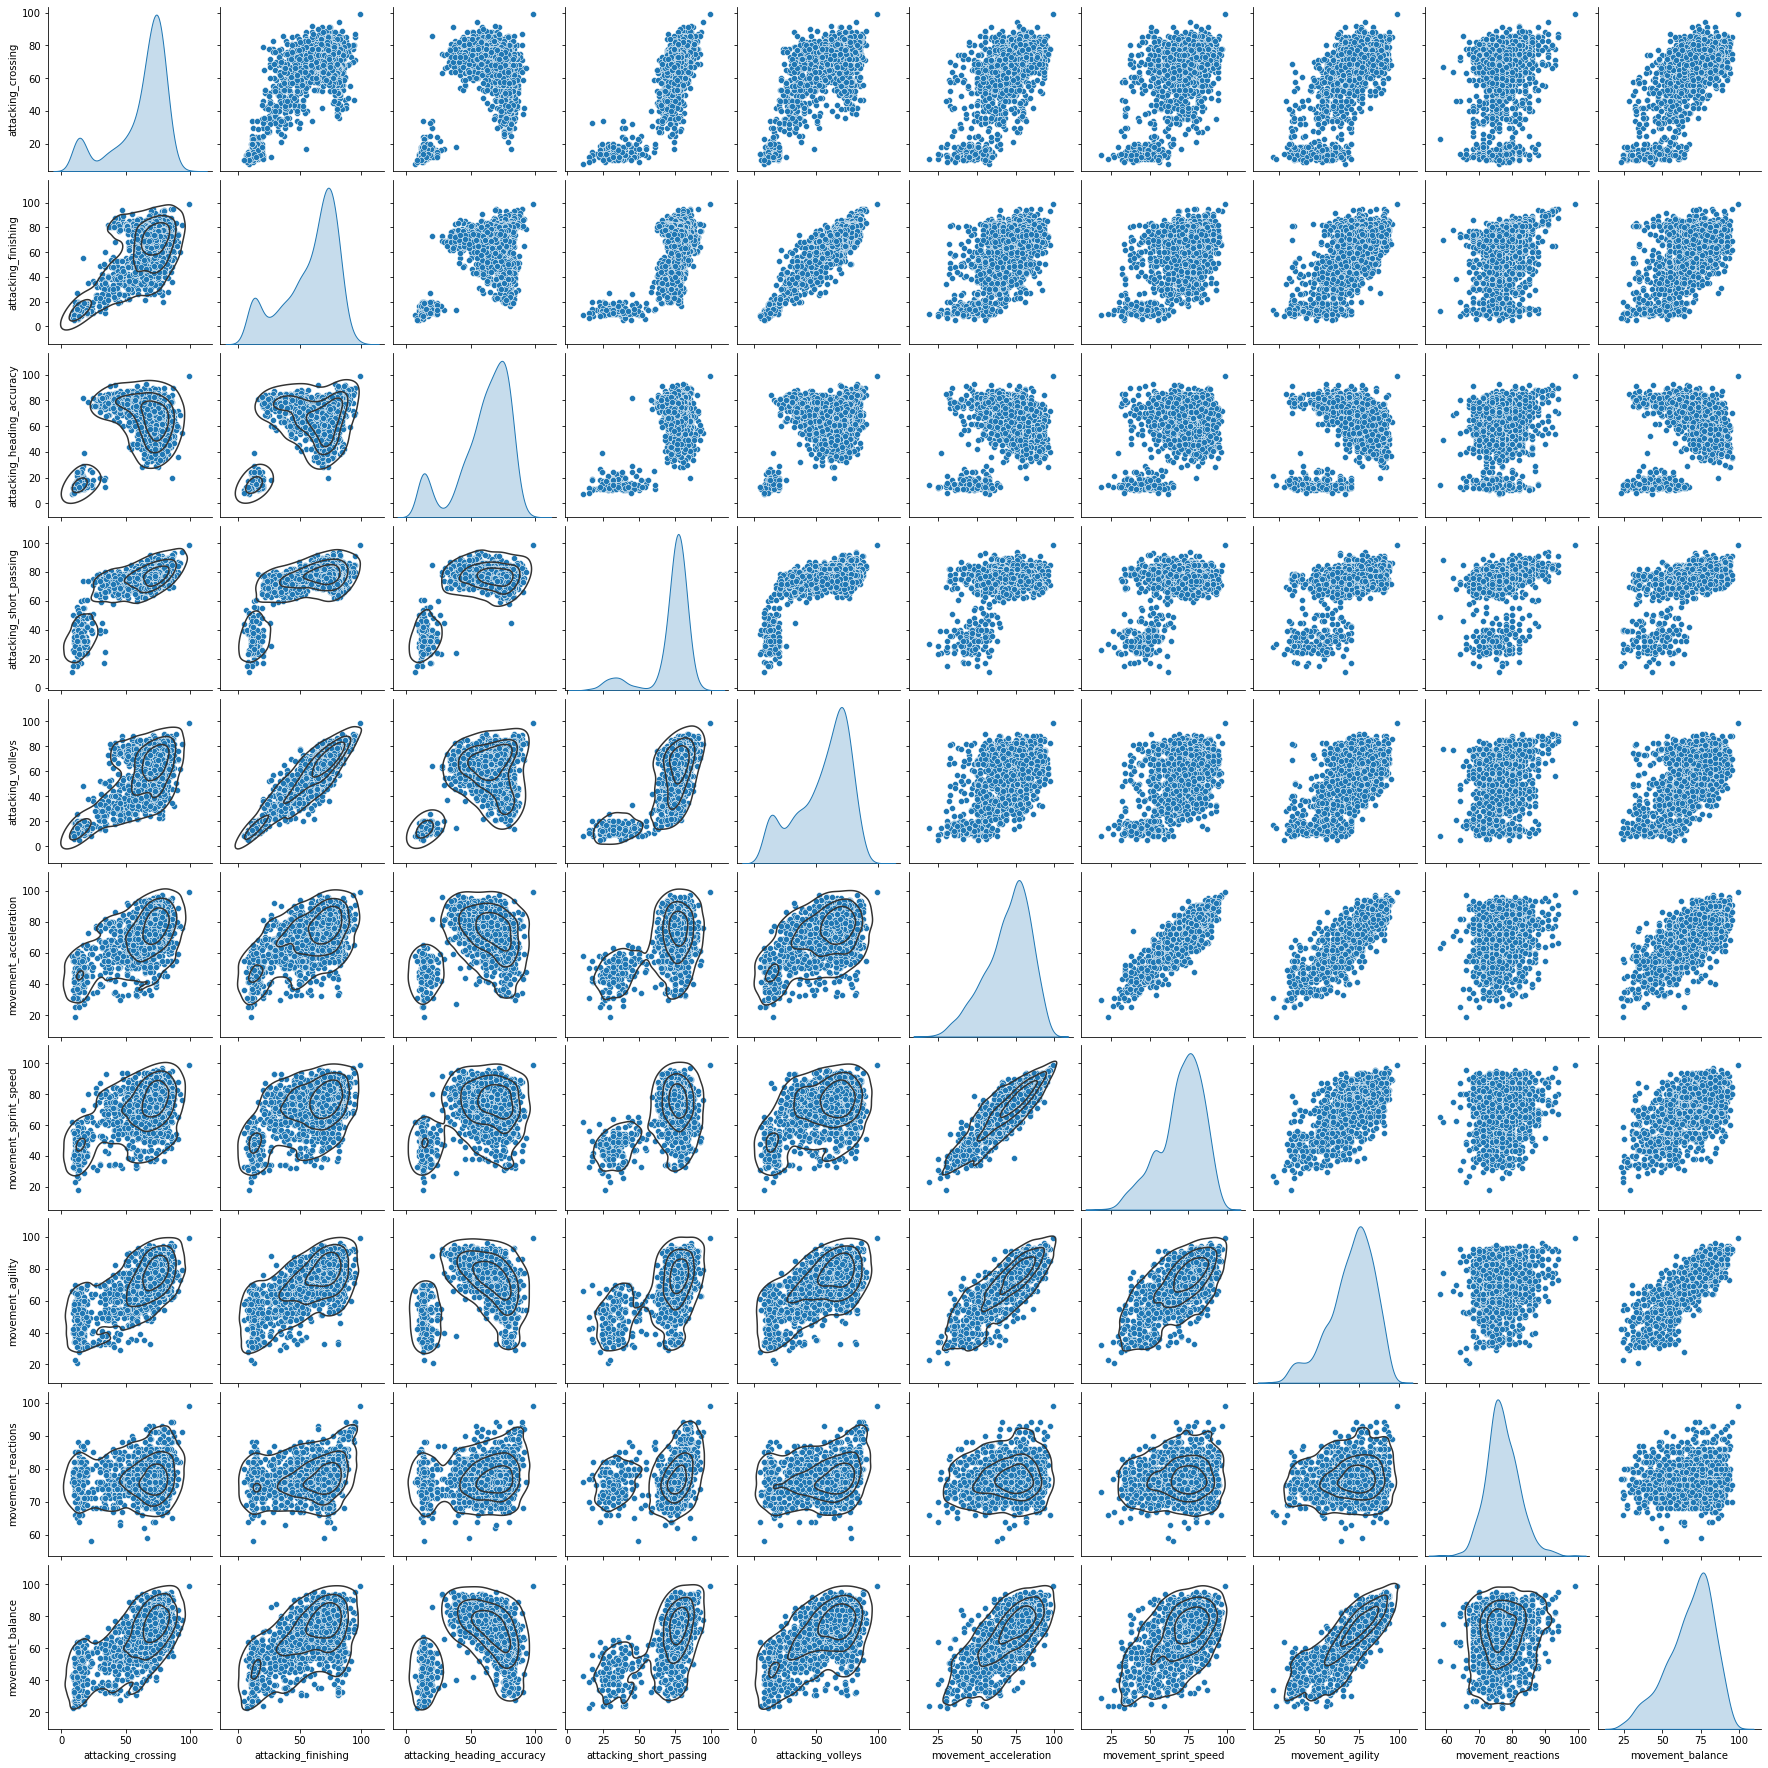

In [23]:
sns.pairplot(df_skills[skills_ratings[0:10]], diag_kind="kde").map_lower(sns.kdeplot, levels=4, color=".2")

# Este gráfico nos muestra la distribución de cada variable (gráficos de barras) y un scatter plot cuando compara dos variables a la vez.

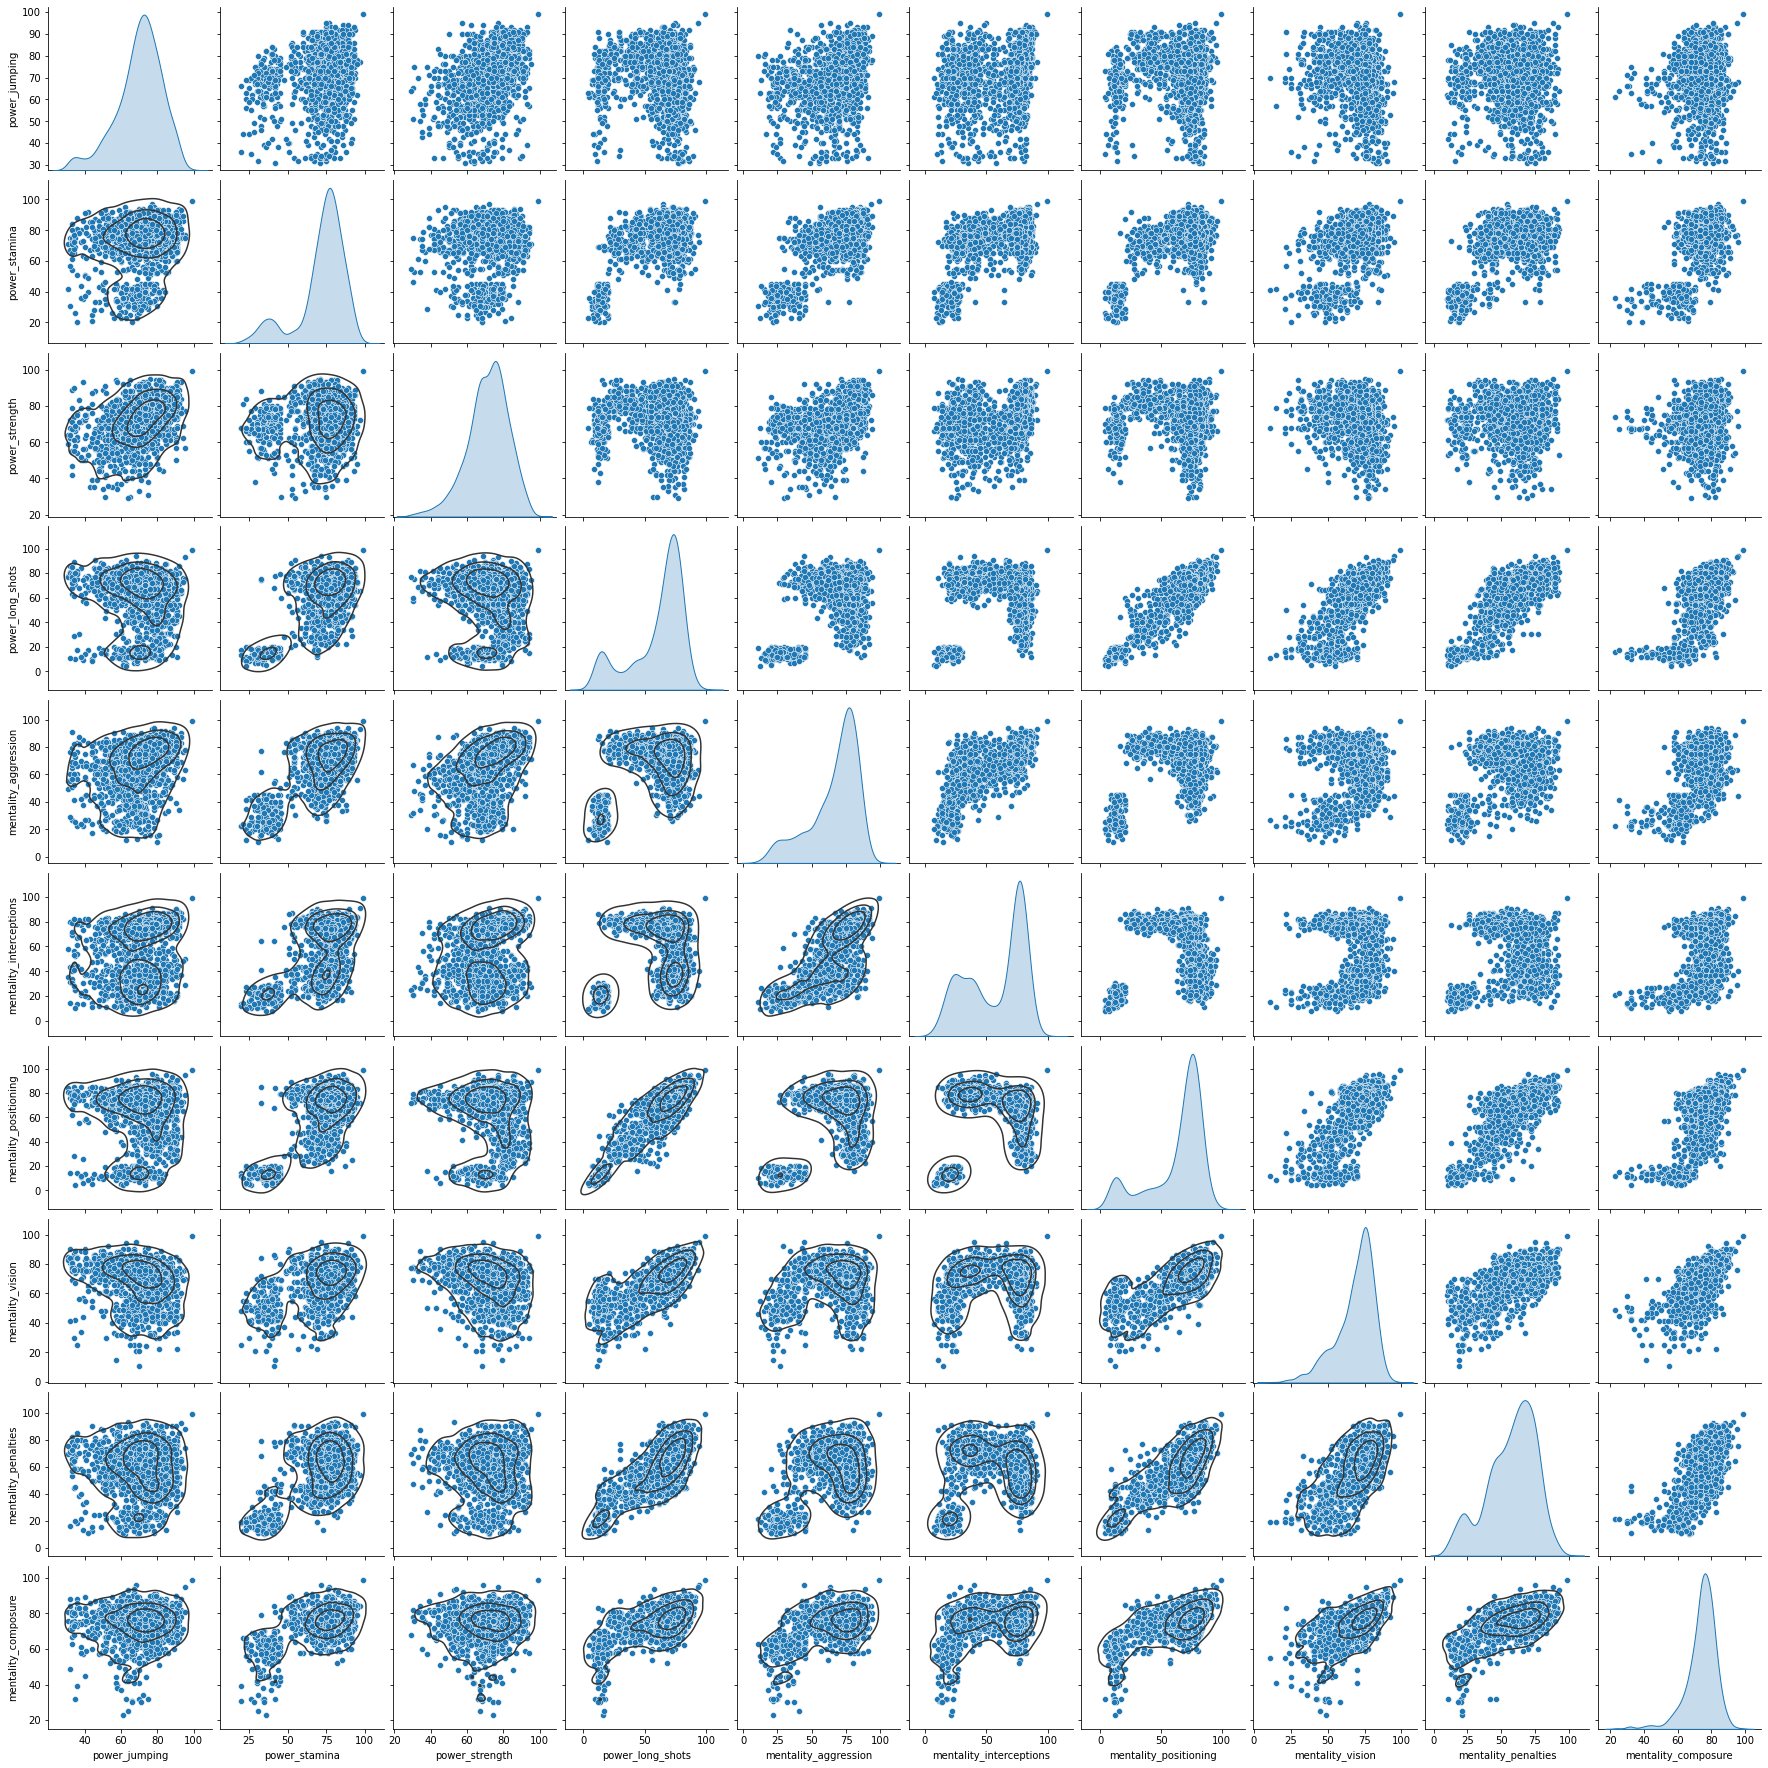

In [24]:
sns.pairplot(df_skills[skills_ratings[11:21]], diag_kind="kde").map_lower(sns.kdeplot, levels=4, color=".2")

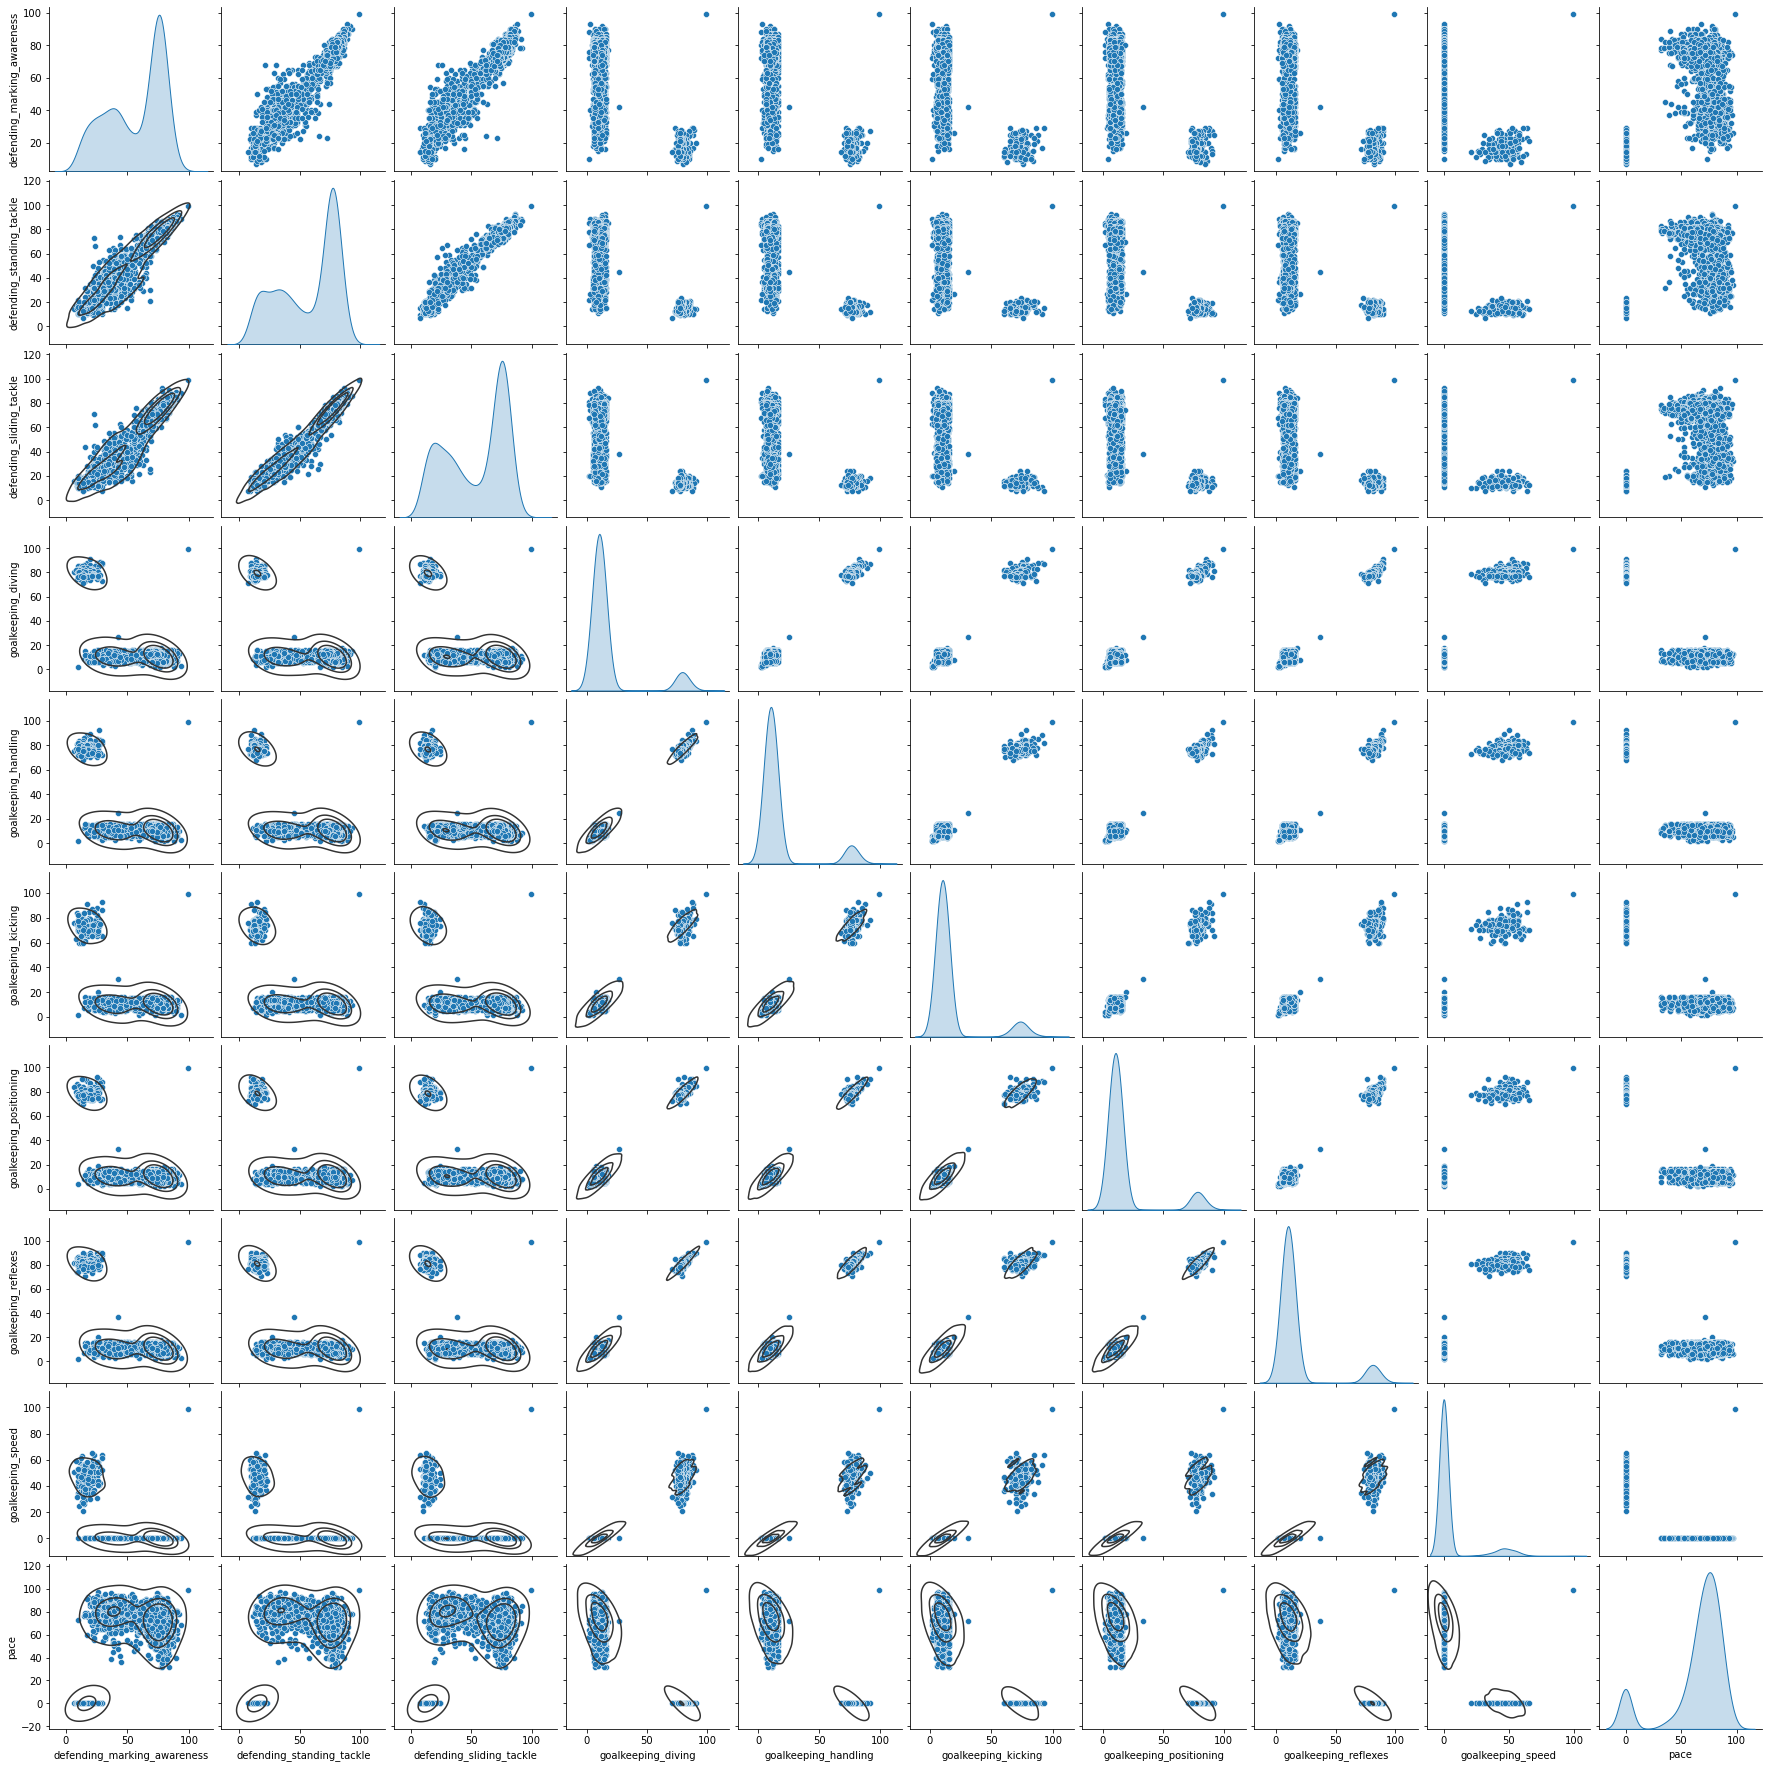

In [25]:
sns.pairplot(df_skills[skills_ratings[21:31]], diag_kind="kde").map_lower(sns.kdeplot, levels=4, color=".2")

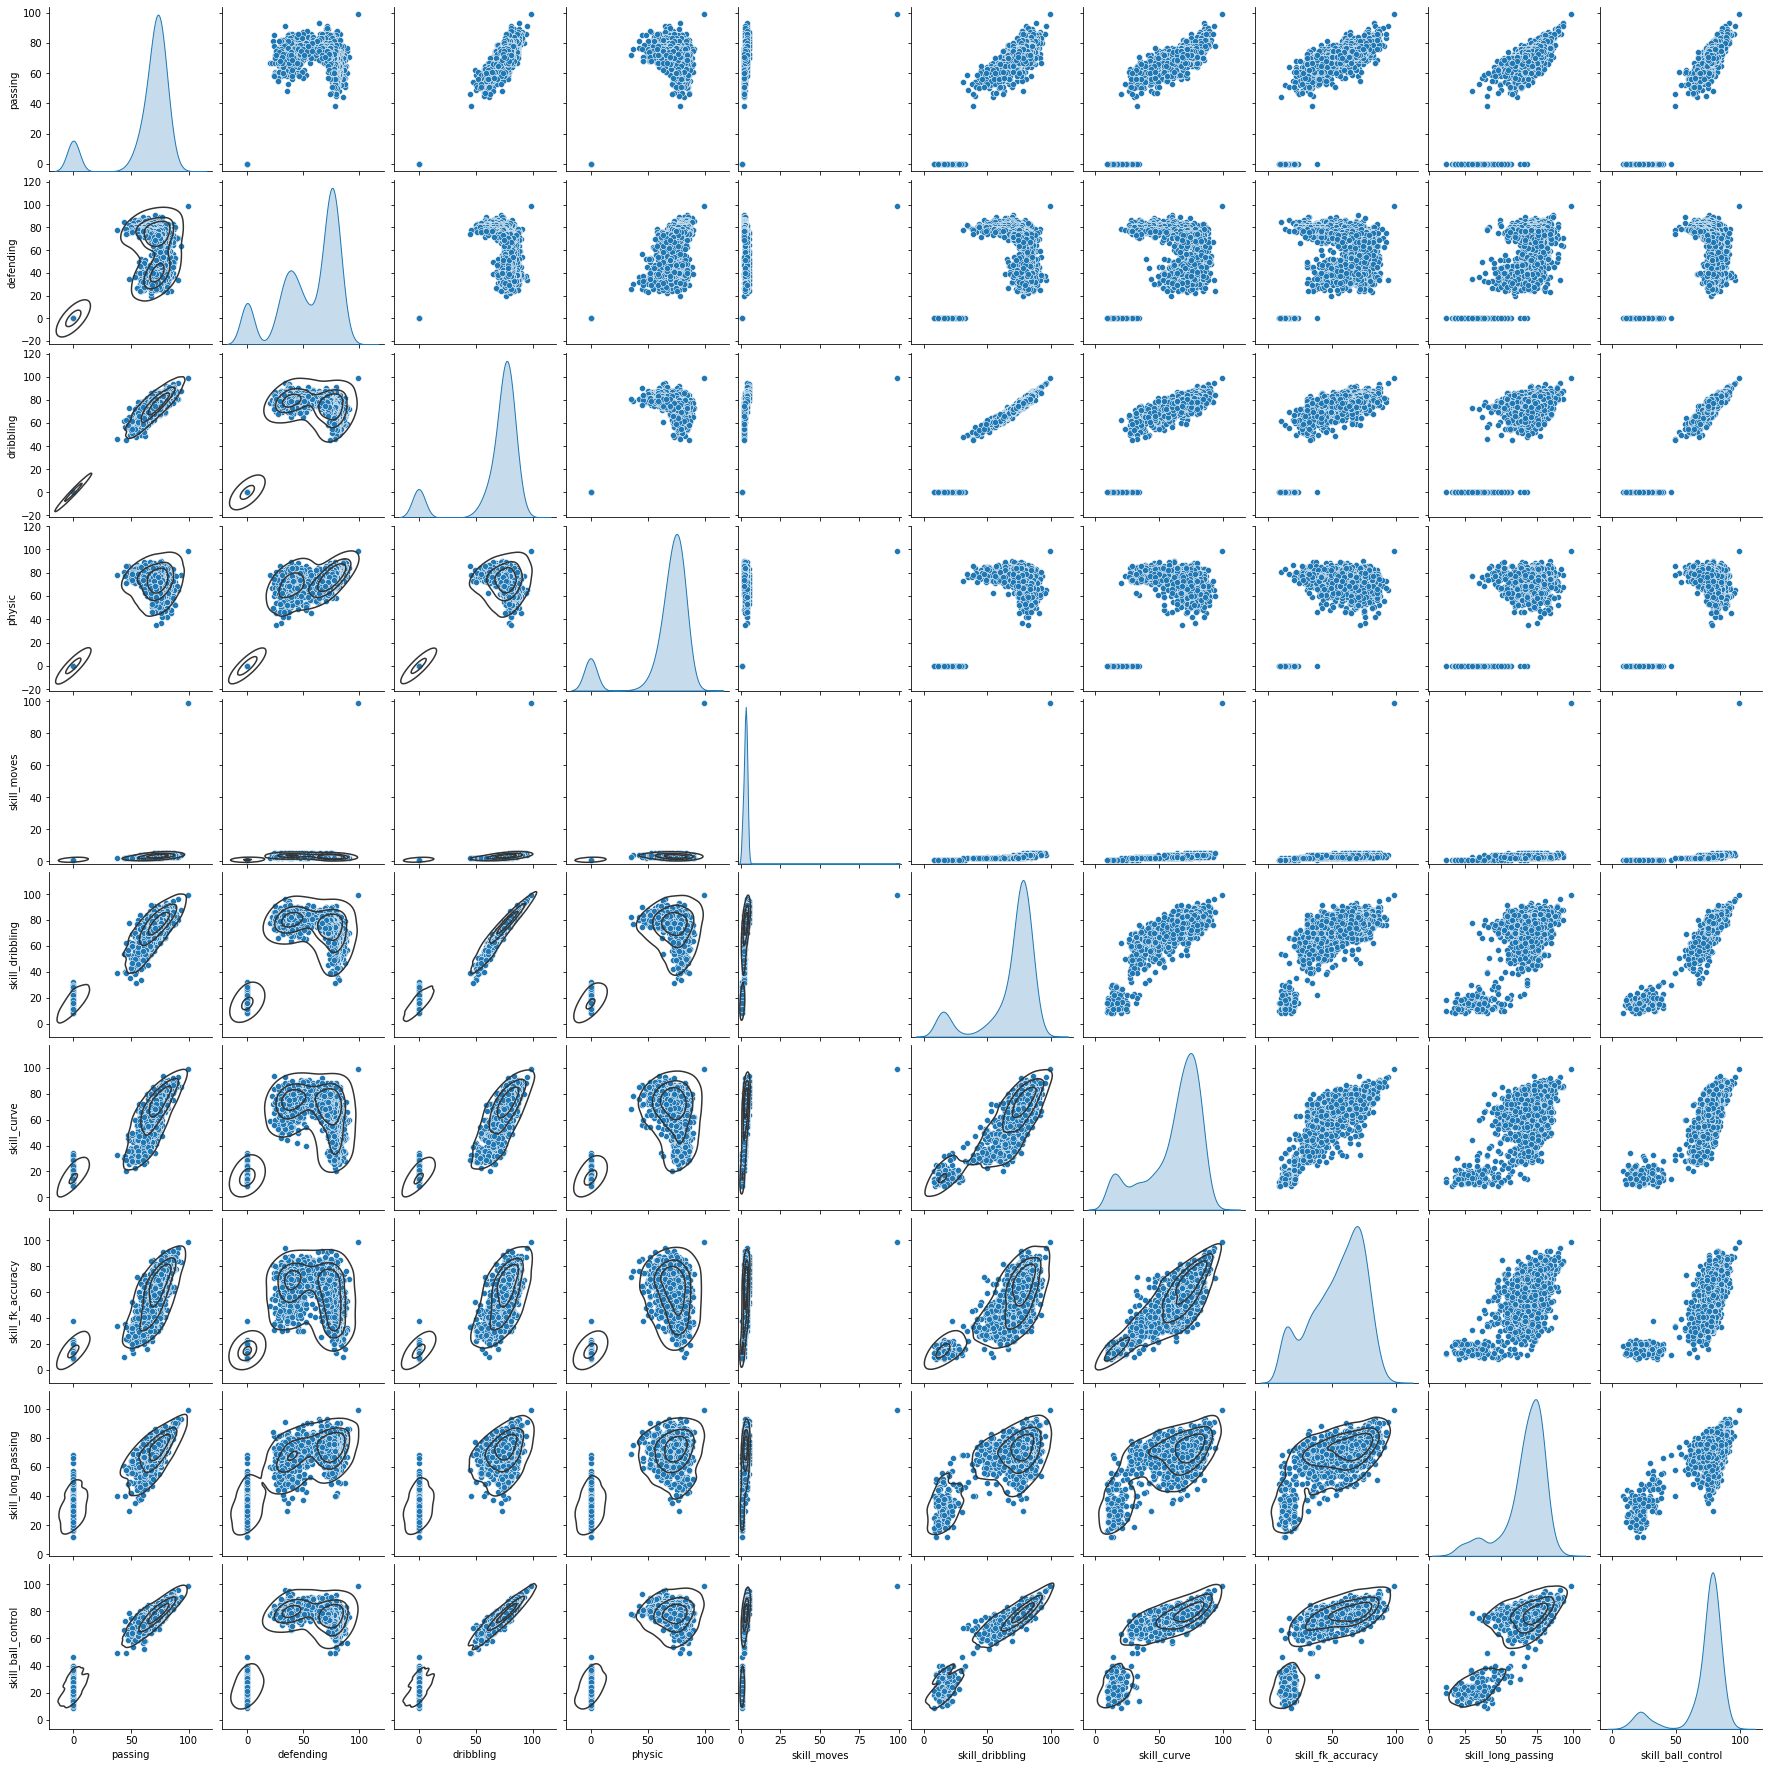

In [26]:
sns.pairplot(df_skills[skills_ratings[32:42]], diag_kind="kde").map_lower(sns.kdeplot, levels=4, color=".2")

In [27]:
#buscamos identificar los mejores jugadores
bool_crack=df_n["overall"] > 90

In [28]:
#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[5]
print(f'Skill uno:{skill_1} \t Skill dos: {skill_2}')

Skill uno:power_long_shots 	 Skill dos: movement_acceleration


Graficamos un scatter plot según las dos habilidades elegidas anteriormente, cada punto representa los puntajes que tiene cada jugador en cada una de estas habilidades.

In [29]:
palette=['blue','green','navy','red','black','pink']  
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], 
                           marker=dict(color=palette[1],size=3)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Mejores Jugadores',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(color='black'),
                      opacity=0.6,marker=dict(color=palette[2],size=3), mode='text') #Mejores jugadores que tiene un overall mayor a 90

data=[graf1,crack]

layout = go.Layout(xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [30]:
#BUSCAMOS A UN JUGADOR PARA PODER UBICARNOS MEJOR EN LOS GRÁFICOS
search_player=df_n["short_name"]=='K. Mbappé' 

bool_crack=df_n["overall"] > 78
bool_MVP=df_n["short_name"]=='MVP'

#Elegir dos números entre 0 y  de n_skills-1.
skill_1=skills_ratings[6] 
skill_2=skills_ratings[12] 
print(f'Skill uno: {skill_1} \t Skill dos: {skill_2}') 

Skill uno: movement_sprint_speed 	 Skill dos: power_stamina


In [31]:
palette=['blue','green','navy','red','black','pink']  
data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers')

n_MVP =go.Scatter(x=df_skills.loc[bool_MVP,skill_1], y=df_skills.loc[bool_MVP,skill_2],name='MVP',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers')


search_player =go.Scatter(x=df_skills.loc[search_player,skill_1], y=df_skills.loc[search_player,skill_2],name='Searched player',
                           text=df_n.loc[search_player,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[5],size=40),mode='markers+text')

data=[n_crack,n_MVP,search_player]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")

Vemos que MBappé esta muy cerca del *Most Valuable Player*.

## 3- Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros

#Clustering con K-medias

In [32]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
# Número de clusters buscado
n_clust = 4 #Tenemos 4 grupos según las posiciones: los delanteros, los defensores, el arquero y los medio campistas. 

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 42 dimensiones

# Etiquetas
clusters = km.labels_
df_clusters=df_n.copy()
df_clusters['kmeans_4'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters encontrados forzando la cantidad')
df_clusters.head(10)

Kmeans encontró:  4 clusters encontrados forzando la cantidad


sofifa_id                                         player_url  \
0   158023.0  https://sofifa.com/player/158023/lionel-messi/...   
1   188545.0  https://sofifa.com/player/188545/robert-lewand...   
2    20801.0  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3   190871.0  https://sofifa.com/player/190871/neymar-da-sil...   
4   192985.0  https://sofifa.com/player/192985/kevin-de-bruy...   
5   200389.0  https://sofifa.com/player/200389/jan-oblak/220002   
6   231747.0  https://sofifa.com/player/231747/kylian-mbappe...   
7   167495.0  https://sofifa.com/player/167495/manuel-neuer/...   
8   192448.0  https://sofifa.com/player/192448/marc-andre-te...   
9   202126.0  https://sofifa.com/player/202126/harry-kane/22...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   
5           J. Oblak                            Jan Oblak               GK   
6          K. Mbappé                 Kylian Mbappé Lottin           ST, LW   
7           M. Neuer                   Manuel Peter Neuer               GK   
8      M. ter Stegen                Marc-André ter Stegen               GK   
9            H. Kane                           Harry Kane               ST   

   overall  potential    value_eur  wage_eur   age  ...    gk  \
0       93       93.0   78000000.0  320000.0  34.0  ...  19+3   
1       92       92.0  119500000.0  270000.0  32.0  ...  19+3   
2       91       91.0   45000000.0  270000.0  36.0  ...  20+3   
3       91       91.0  129000000.0  270000.0  29.0  ...  20+3   
4       91       91.0  125500000.0  350000.0  30.0  ...  21+3   
5       91       93.0  112000000.0  130000.0  28.0  ...  89+3   
6       91       95.0  194000000.0  230000.0  22.0  ...  18+3   
7       90       90.0   13500000.0   86000.0  35.0  ...  88+2   
8       90       92.0   99000000.0  250000.0  29.0  ...  88+3   
9       90       90.0  129500000.0  240000.0  27.0  ...  20+3   

                                     player_face_url  \
0  https://cdn.sofifa.net/players/158/023/22_120.png   
1  https://cdn.sofifa.net/players/188/545/22_120.png   
2  https://cdn.sofifa.net/players/020/801/22_120.png   
3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  https://cdn.sofifa.net/players/192/985/22_120.png   
5  https://cdn.sofifa.net/players/200/389/22_120.png   
6  https://cdn.sofifa.net/players/231/747/22_120.png   
7  https://cdn.sofifa.net/players/167/495/22_120.png   
8  https://cdn.sofifa.net/players/192/448/22_120.png   
9  https://cdn.sofifa.net/players/202/126/22_120.png   

                             club_logo_url  \
0   https://cdn.sofifa.net/teams/73/60.png   
1   https://cdn.sofifa.net/teams/21/60.png   
2   https://cdn.sofifa.net/teams/11/60.png   
3   https://cdn.sofifa.net/teams/73/60.png   
4   https://cdn.sofifa.net/teams/10/60.png   
5  https://cdn.sofifa.net/teams/240/60.png   
6   https://cdn.sofifa.net/teams/73/60.png   
7   https://cdn.sofifa.net/teams/21/60.png   
8  https://cdn.sofifa.net/teams/241/60.png   
9   https://cdn.sofifa.net/teams/18/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   
5      https://cdn.sofifa.net/flags/es.png   
6      https://cdn.sofifa.net/flags/fr.png   
7      https://cdn.sofifa.net/flags/de.png   
8      https://cdn.sofifa.net/flags/es.png   
9  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://c

In [33]:
bool_grosso=df_n["overall"] > 85 #Jugadores muy buenos.
bool_no_grosso=df_n["overall"]<=84 #Jugadores promedio.

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[16] 
skill_2=skills_ratings[17] 
print(f'Skill uno: {skill_1} \t Skill dos: {skill_2}') #elegimos las variables según los gráficos del punto 2.

Skill uno: mentality_interceptions 	 Skill dos: mentality_positioning


Graficamos los clusters en base a solo dos habilidades y con los nombres de los jugadores que son muy buenos. 

In [34]:
kmedia_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                showscale=False)
                           )

grosso =go.Scatter(x=df_skills.loc[bool_grosso,skill_1], y=df_skills.loc[bool_grosso,skill_2],name='Grosso',
                      text=df_n.loc[bool_grosso,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmedia_clusters,grosso]

layout = go.Layout(title="Clustering con K-medias ",
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

/tmp/ipykernel_6862/2137802575.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



El cluster en la esquina izquierda inferior son los que pertenecen al grupo de arquero. El resto de los grupos se mezclan un poco pero se pueden separar y visualizar bastante bien los distintos clusters. 

###Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters

Text(0.5, 1.0, 'Inercia de k-Medias VS Número de Clusters')

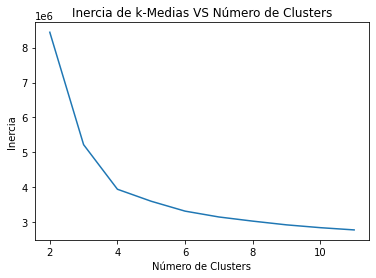

In [35]:
puntajes = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), puntajes)
plt.xlabel('Número de Clusters')
plt.ylabel("Inercia")
plt.title("Inercia de k-Medias VS Número de Clusters")

Por lo visto en el gráfico, el primer codo se encuentra en n=4, como fue propuesto en el ejercicio.

#Clustering con DBSCAN

In [36]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

En DBSCAN se debe establecer el **epsilon**, definida como la distancia máxima entre dos muestras para ser consideradas vecinas entre ellas. No es la distancia  máxima entre las observaciones de cada cluster sino entre clusters para poder agrupar los datos en distintos conjuntos.

Una forma de encontrar el epsilon adecuado es realizando el gráfico a continuación.

Text(0, 0.5, 'Distance')

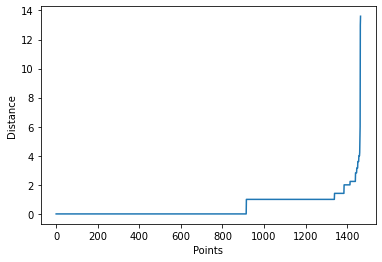

In [37]:
#FIND EPSILON
k = 2
data_nn = df_n.copy()[['attacking_volleys', 'attacking_short_passing']] #Vamos probando con distintas variables
# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

Por lo visto en el gráfico se va a utilizar una distancia igual a 4, a partir de ella hay una mayor cantidad de puntos que se encuentran más cerca entre ellos para poder formar los distintos conjuntos.

In [38]:
# Asignamos a cada posición el grupo al cual pertencen
Delantero=['RW', 'ST', 'CF', 'LW']
Mediocampista=['LM','CAM','CDM','RM','CM']
Defensor=['RB','CB','LB','RB','RWB','LWB']
Arquero=['GK']

def pos2(position):
    if position in Delantero:
        return 'Delantero'
    
    elif position in Mediocampista:
        return 'Mediocampista'
    
    elif position in Defensor:
        return 'Defensor'
    
    elif position in Arquero:
        return 'Arquero'
    
    else:
        return 'nan'

df_n["Position2"]=df_n["player_positions"].str.split(',').str[0].apply(lambda x: pos2(x))
df_n["Position2"].value_counts()

Mediocampista    570
Defensor         437
Delantero        300
Arquero          157
nan                1
Name: Position2, dtype: int64

In [39]:
dict_replace = {'Delantero' : 0, 'Mediocampista' : 1, 'Defensor' : 2, 'Arquero' : 3} 
df_n['Position3'] = df_n['Position2']
df_n.replace({"Position3": dict_replace}, inplace=True) # Cambiamos el nombre del grupo al que pertencen por números. Esto nos puede ayudar para comparar
# la asignación del cluster con DBSCAN con una asignación manual para ver si el método asigno a los jugadores de los mismos grupos en el mismo cluster. 

Text(0, 0.5, 'attacking_short_passing')

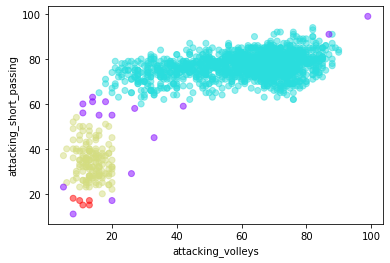

In [40]:
df_n['dbscan'] = DBSCAN(eps=4).fit_predict(df_n[['attacking_volleys', 'attacking_short_passing']])
plt.scatter(
    df_n['attacking_volleys'],
    df_n['attacking_short_passing'],
    c = df_n['dbscan'],
    alpha=0.5,
    cmap='rainbow' 
              )
plt.xlabel("attacking_volleys")
plt.ylabel("attacking_short_passing")

# 4-Evaluación y Análisis de los clusters encontrados.

Del gráfico anterior podemos identificar claramente los 4 clusters utilizando una distancia máxima entre samples de 4.

Las variableas analizadas fueron "attacking_volleys" y "attacking_short_passing"

A simple vista podemos identificar al grupo de los arqueros en la parte inferior del grafico, con valores medios y bajos de attacking_short_passing pero bajos de attacking_volleys.
Por otro lado el grupo de Delanteros se concentra en la parte derecha superior con altos valores de ambos.

El resto de las posiciones poseen valores más aleatorios dependiendo de cada jugador.

#5 ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

Todos los valores del dataset que fueron utilizados para formar los clusters poseen valores entre 0 y 100 dado que son puntajes de las habilidades, por lo cual no es fue necesario realizar una normalización de la base al variar en el mismo rango. Todas las variables son de naturaleza discreta. 

#6. Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

Tomamos el dataframe con la cantidad reducida de jugaores y con un overall mayor a 75 y solo nos quedamos con las columnas con las habilidades para aplicar un Embedding. En este caso vamos a utilizar PCA. 

In [41]:
df_n = df_n[df_n['short_name']!= 'MVP'] #Quitamos el MVP que habiamos creado solo para ubicarnos en el gráfico
df_pca = df_n[skills_ratings]
df_pca = df_pca.fillna(1)

In [42]:
std_scale=preprocessing.StandardScaler().fit(df_pca) #Para utilizar PCA se deben escalar los datos dado que el ajuste de PCA los centra y luego calcula la matriz de dipersión
# si los datos no estan escalados alguna de ellas puede "tironear" el PCA hacia una dirección. En este caso podría no ser tan necesario dado que las variables varían en el mismo 
# rango.  
df_scaled=std_scale.transform(df_pca)
df_scaled

array([[ 1.11543304,  1.67563373,  0.46800338, ...,  1.95955673,
         1.65540459,  1.37164453],
       [ 0.4272357 ,  1.67563373,  1.4647403 , ...,  1.5194831 ,
         0.22821001,  0.91937255],
       [ 1.21374695,  1.67563373,  1.4647403 , ...,  1.47058603,
         0.70394153,  0.91937255],
       ...,
       [-0.16264773,  0.58353455, -0.72808091, ...,  0.19926224,
         0.5000566 ,  0.41056657],
       [ 0.77133437,  0.31050976, -0.22971246, ...,  0.44374758,
         0.02432507,  0.18443058],
       [-1.58819937, -1.60066381,  0.51784023, ..., -1.31654691,
         0.63597989, -0.1547734 ]])

La idea de utilizar un embeddings no es solo poder reducir la dimensionalidad cuando nuestro problema tiene muchas dimensiones (como en este caso que son 42 habilidades, es un espacio de 42 dimensiones), sino que elegir aquellas características que mejor represente los datos para poder agruparlos mejor.

Los componentes principales son las características que minimizan el error de reconstruir los datos originales, es decir, son combinaciones lineales que minimizan la pérdida de información que surge de transformar tus datos originales. 

In [43]:
pca=decomposition.PCA(n_components=7) 

pca.fit(df_scaled) 

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

df_projected=pca.transform(df_scaled)
print ('tamaño de los datos: ', df_projected.shape)

proporción de varianza por componente:  [0.61305164 0.15600006 0.04870186 0.04355693 0.03042453 0.01573759
 0.01344237]
proporción de varianza por componente acumulada:  [0.61305164 0.7690517  0.81775356 0.86131049 0.89173502 0.90747261
 0.92091498]
tamaño de los datos:  (1464, 7)


Las 7 componentes principales explica más del 90% de la variabilidad de los datos, mayor variabilidad significa mayor información y por ende menor pérdida de la misma. Se busca la dimensión donde los datos varían más. 

In [44]:
pcs=pca.components_
data=[]

for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=df_skills.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Aplicamos K-Means con los componentes principales encontrados. Con este método estamos forzando al algoritmo a que encuentre la cantidad de clusters que le indiquemos. 

In [45]:
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_projected)
clusters = km.labels_

In [46]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

In [47]:
# Graficamos
data = []
kmean_clusters = go.Scatter(x=df_projected[:,0], y=df_projected[:,1],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), 
                                colorscale='sunsetdark',
                                showscale=False)
                           )

crack =go.Scatter(x=df_projected[bool_crack,0], y=df_projected[bool_crack,1],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters, crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

/tmp/ipykernel_6862/101055725.py:8: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Ahora realizamos lo mismo pero con Mean-Shift. En este caso nosotros podemos establecer el parámetro bandwidth que es el que determina cuántos clusters se van a formar dado que define un entorno de cercanía a cada dato donde va actualizando los candidatos a centroides que van a ser las medias de los puntos pertenecientes a una región. 

In [48]:
ms = MeanShift(bandwidth = 3, bin_seeding=True)

ms.fit(df_projected)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 4


In [49]:
data=[]
MeanShift_clusters = go.Scatter(x=df_projected[:,0], y=df_projected[:,1],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='agsunset',
                                showscale=False)
                           )

crack =go.Scatter(x=df_projected[bool_crack,0], y=df_projected[bool_crack,1],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

/tmp/ipykernel_6862/2000027175.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Se prueba obtener las dos componentes principales utilizando T-SNE, este embbeding tiene la misma finalidad que el PCA en cuanto a la reducción de dimensionalidad pero lo hace a partir de la reconstrucción de la distribución de probabilidad, por lo tanto a pares objetos que son similares son asignados con una alta probabilidad y los pares que son distintos una baja probabilidad. 

In [50]:
from sklearn.manifold import TSNE
df_embedded = TSNE(2).fit_transform(df_scaled)

/home/camila/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/camila/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [51]:
n_clust = 4

km_tsne = KMeans(n_clusters=n_clust)
km_tsne.fit(df_embedded)
clusters_tsne = km_tsne.labels_

In [52]:
data = []
kmean_clusters = go.Scatter(x=df_embedded[:,0], y=df_embedded[:,1],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters_tsne.astype(np.float), 
                                colorscale='agsunset',
                                showscale=False)
                           )

crack =go.Scatter(x=df_embedded[bool_crack,0], y=df_embedded[bool_crack,1],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters, crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

/tmp/ipykernel_6862/4125851079.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [53]:
ms_tsne = MeanShift(bin_seeding=True) #Vamos a dejar que el mismo algoritmo estime el parámetro bandwidth

ms_tsne.fit(df_embedded)

clusters2 = ms_tsne.labels_
cluster_centers = ms_tsne.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 3


In [54]:
data=[]
MeanShift_clusters = go.Scatter(x=df_embedded[:,0], y=df_embedded[:,1],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='agsunset',
                                showscale=False)
                           )

crack =go.Scatter(x=df_embedded[bool_crack,0], y=df_embedded[bool_crack,1],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

/tmp/ipykernel_6862/1534864918.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Dado que estamos buscando formar clusters según las posiciones de los jugadores es más apropiado utilizar T-SNE dado que reconstruye los datos originales en base a la distribución de probabilidad de las distintas características, agrupando por similitud. En los últimos dos gráficos donde se aplican los mismos métodos de clusterización pero al dataframe escalado y aplicando T-SNE vemos que hay separación más marcada entre los distintos grupos. 

En este último método vemos que el algoritmo por si solo encuentra 3 clusters en vez de 4 que son los que buscamos. Esto puede deberse a que algunos grupos de posiciones comparten ciertas habilidades que los hacen dificilmente separables entre ellos, el grupo que en todos los casos se separa muy bien del resto son los arqueros mientras que le hes difícil separar totalmente los delanteros, de los defensores y de los mediocampistas. Sin embargo aunque no estén separados podemos ver que los grupos estan bien delimitados en estos últimos gráficos. 